In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
brasileirao = pd.read_csv(
    'https://github.com/ricardomattos05/Brazilian-Soccer-Data/blob/master/Data/Brasileirao_Matches.csv?raw=true',
    )

brasileirao['datetime'] = pd.to_datetime(brasileirao['datetime'])
brasileirao

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1
...,...,...,...,...,...,...,...,...,...
4165,NaT,Botafogo-RJ,RJ,Santos-SP,SP,NaN,NaN,2022,37
4166,NaT,Palmeiras-SP,SP,America-MG,MG,NaN,NaN,2022,37
4167,NaT,Sao Paulo-SP,SP,Internacional-RS,RS,NaN,NaN,2022,37
4168,NaT,Fluminense-RJ,RJ,Goias-GO,GO,NaN,NaN,2022,37


In [4]:
print('Data atual: ', datetime.now().strftime('%d/%m/%Y %H:%M:%S'))

Data atual:  24/09/2022 23:37:57


In [5]:
# Removendo jogos sem resultado (jogos que ainda não foram realizados)
brasileirao = brasileirao.dropna()

In [6]:
print('Quantidade de matches: ', len(brasileirao))
print('Primeiro match: ', brasileirao['datetime'].min().strftime('%d/%m/%Y %H:%M:%S'))
print('Último match: ', brasileirao['datetime'].max().strftime('%d/%m/%Y %H:%M:%S'))

Quantidade de matches:  4069
Primeiro match:  19/05/2012 18:30:00
Último match:  19/09/2022 20:00:00


In [7]:
teams = list(set(brasileirao['home_team'].unique()) | set(brasileirao['away_team'].unique()))
states = list(set(brasileirao['home_team_state'].unique()) | set(brasileirao['away_team_state'].unique()))

print(f'Total de times: {len(teams)}')
print(f'Total de estados: {len(states)}')

Total de times: 36
Total de estados: 12


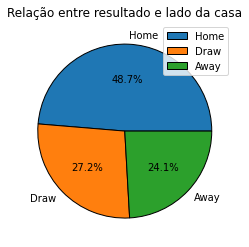

In [8]:
brasileirao['result'] =  brasileirao['home_goal'] - brasileirao['away_goal']
brasileirao['result'] = brasileirao['result'].apply(lambda x: 'home' if x > 0 else 'away' if x < 0 else 'draw')

count = brasileirao['result'].value_counts()

plt.pie(count, 
    labels=count.index.str.capitalize(),
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'},
    )
plt.title('Relação entre resultado e lado da casa')
plt.legend()
plt.show()

In [9]:
state_stats = []
for state in states:
    home = brasileirao[brasileirao['home_team_state'] == state]
    away = brasileirao[brasileirao['away_team_state'] == state]

    state_stats.append({
        'state': state,
        'total_games': len(home) + len(away),
        'total_wins': len(home[home['result'] == 'home']) + len(away[away['result'] == 'away']),
        'total_draws': len(home[home['result'] == 'draw']) + len(away[away['result'] == 'draw']),
        'total_losses': len(home[home['result'] == 'away']) + len(away[away['result'] == 'home']),
    })

state_stats = pd.DataFrame(state_stats)
state_stats.set_index('state', inplace=True)

state_stats.head()

,total_games,total_wins,total_draws,total_losses
state,,,,
PE,418,123,97,198
MG,851,358,221,272
AL,38,8,8,22
RS,814,337,232,245
RJ,1411,548,366,497


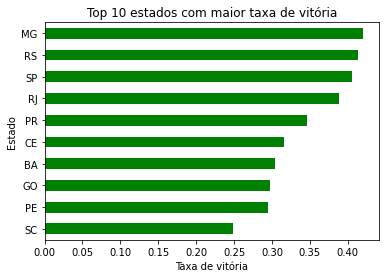

In [10]:
# Top 10 estados com maior taxa de vitória
state_stats['win_rate'] = state_stats['total_wins'] / state_stats['total_games']

top_win_rate = state_stats.sort_values('win_rate', ascending=False).win_rate.head(10)[::-1]

top_win_rate.plot.barh(color='green')
plt.title('Top 10 estados com maior taxa de vitória')
plt.xlabel('Taxa de vitória')
plt.ylabel('Estado')
plt.show()


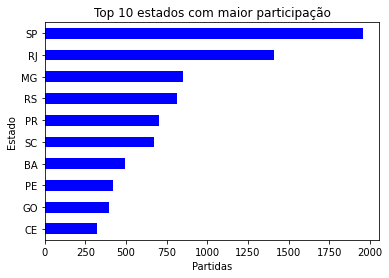

In [11]:
# Top 10 estados com maior participação
top_participation = state_stats.sort_values('total_games', ascending=False).total_games.head(10)[::-1]

top_participation.plot.barh(color='blue')
plt.title('Top 10 estados com maior participação')
plt.xlabel('Partidas')
plt.ylabel('Estado')
plt.show()

In [12]:
team_stats = []
for team in teams:
    home = brasileirao[brasileirao['home_team'] == team]
    away = brasileirao[brasileirao['away_team'] == team]

    team_stats.append({
        'team': team,
        'total_games': len(home) + len(away),
        'total_wins': len(home[home['result'] == 'home']) + len(away[away['result'] == 'away']),
        'total_draws': len(home[home['result'] == 'draw']) + len(away[away['result'] == 'draw']),
        'total_losses': len(home[home['result'] == 'away']) + len(away[away['result'] == 'home']),
    })

team_stats = pd.DataFrame(team_stats)
team_stats.set_index('team', inplace=True)

team_stats.head()

,total_games,total_wins,total_draws,total_losses
team,,,,
Santos-SP,407,167,116,124
Vasco da Gama-RJ,266,84,80,102
Portuguesa-SP,76,22,27,27
Palmeiras-SP,369,173,86,110
Avai-SC,141,31,40,70


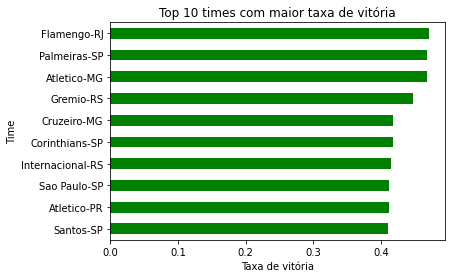

In [13]:
# Top 10 times com maior taxa de vitória
team_stats['win_rate'] = team_stats['total_wins'] / team_stats['total_games']

top_win_rate = team_stats.sort_values('win_rate', ascending=False).win_rate.head(10)[::-1]

top_win_rate.plot.barh(color='green')
plt.title('Top 10 times com maior taxa de vitória')
plt.xlabel('Taxa de vitória')
plt.ylabel('Time')
plt.show()

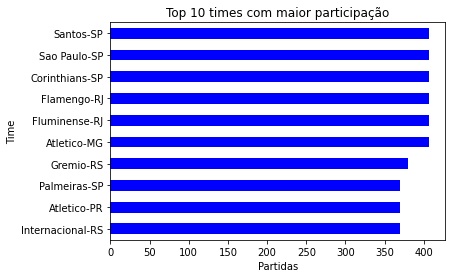

In [14]:
# Top 10 times com maior participação
top_participation = team_stats.sort_values('total_games', ascending=False).total_games.head(10)[::-1]

top_participation.plot.barh(color='blue')
plt.title('Top 10 times com maior participação')
plt.xlabel('Partidas')
plt.ylabel('Time')
plt.show()